<a href="https://colab.research.google.com/github/minukjeong/python/blob/main/DL_08_MNIST_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0

In [ ]:
z_dim = 16

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Dropout, Input

discriminator = Sequential([
                      Flatten(input_shape=(28, 28)),
                      Dense(128, activation="relu"),
                      Dropout(0.2),
                      Dense(32, activation="relu"),
                      Dropout(0.2),
                      Dense(8, activation="relu"),
                      Dropout(0.2),
                      Dense(1, activation="sigmoid"),
])

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

generator = Sequential([
                      Dense(64, activation="relu", input_dim=z_dim),
                      Dropout(0.2),
                      Dense(256, activation="relu"),
                      Dropout(0.2),
                      Dense(784, activation="sigmoid"),
                      Reshape((28, 28))
])

discriminator.trainable = False     #generator를 학습할때는 discrimnator은 학습이 안되게 설정함
GAN = Sequential([generator, discriminator])
GAN.compile(loss='binary_crossentropy', optimizer='adam')

discriminator.summary()
generator.summary()
GAN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                 264       
                                                                 
 dropout_7 (Dropout)         (None, 8)                

0


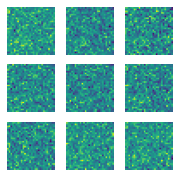

1000


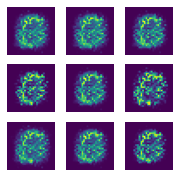

2000


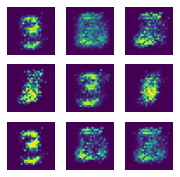

3000


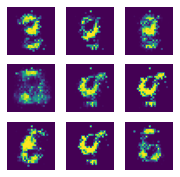

4000


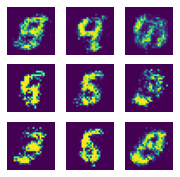

5000


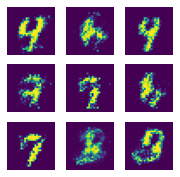

6000


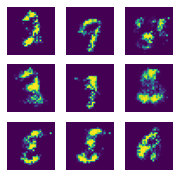

7000


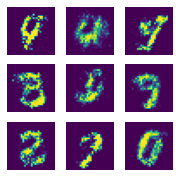

8000


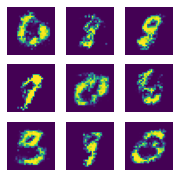

9000


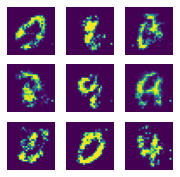

10000


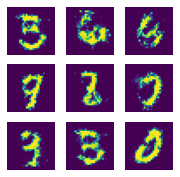

11000


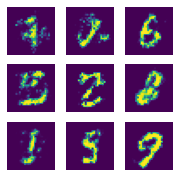

12000


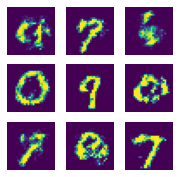

13000


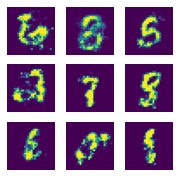

14000


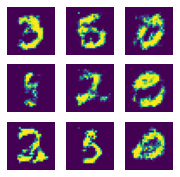

15000


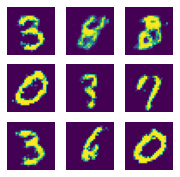

16000


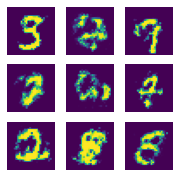

17000


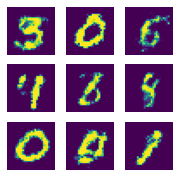

18000


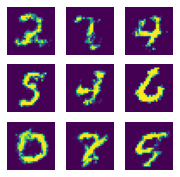

19000


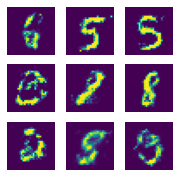

20000


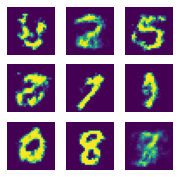

21000


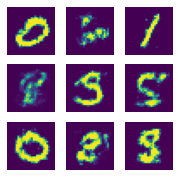

22000


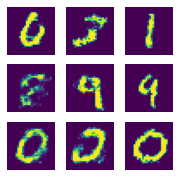

23000


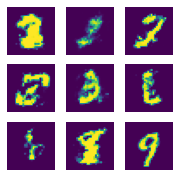

24000


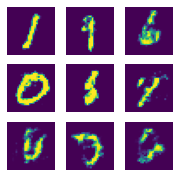

25000


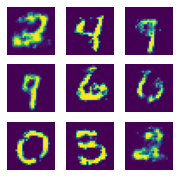

26000


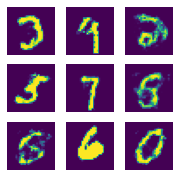

27000


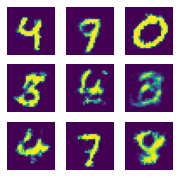

28000


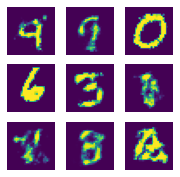

29000


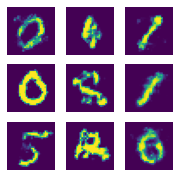

30000


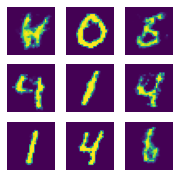

31000


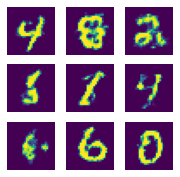

32000


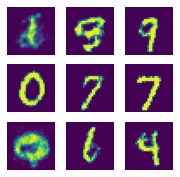

33000


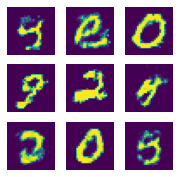

34000


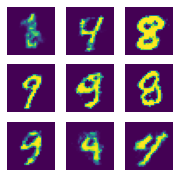

35000


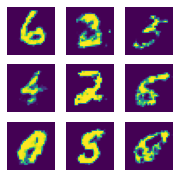

36000


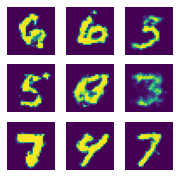

37000


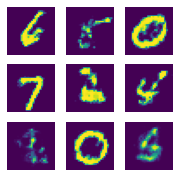

38000


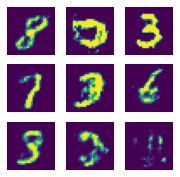

39000


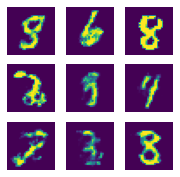

40000


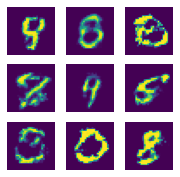

41000


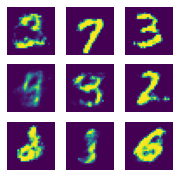

42000


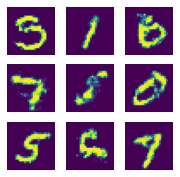

43000


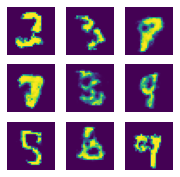

44000


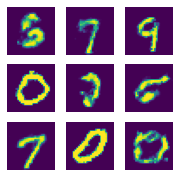

45000


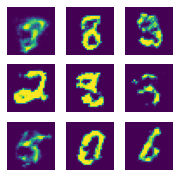

46000


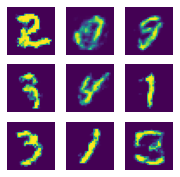

47000


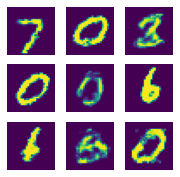

48000


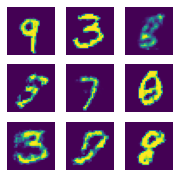

49000


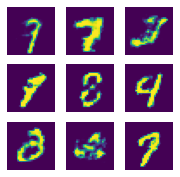

50000


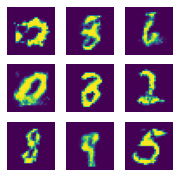

51000


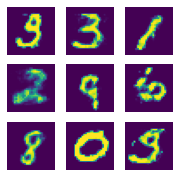

52000


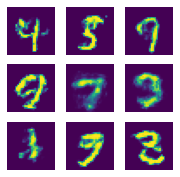

53000


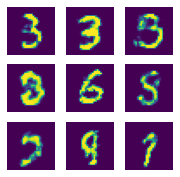

54000


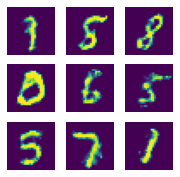

55000


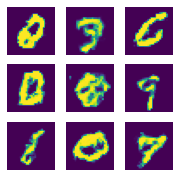

56000


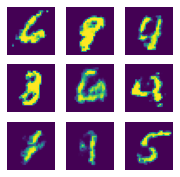

57000


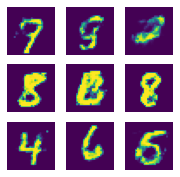

58000


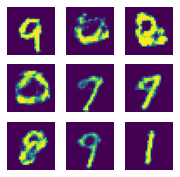

59000


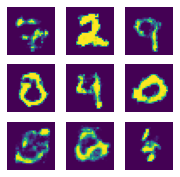

60000


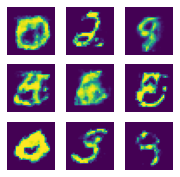

61000


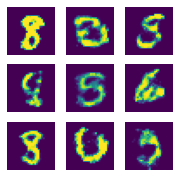

62000


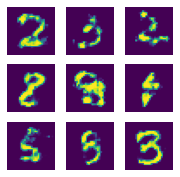

63000


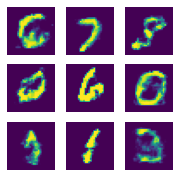

64000


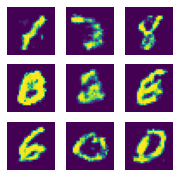

65000


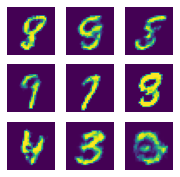

66000


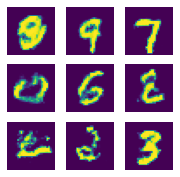

67000


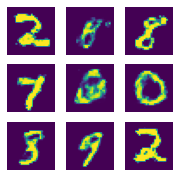

68000


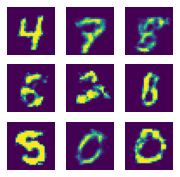

69000


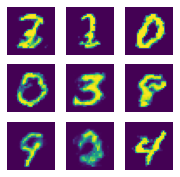

70000


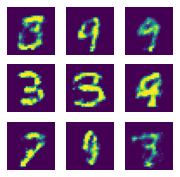

71000


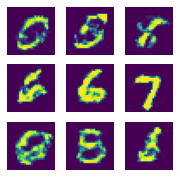

72000


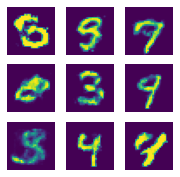

73000


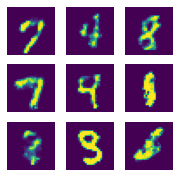

74000


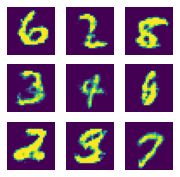

75000


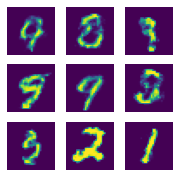

76000


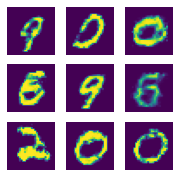

77000


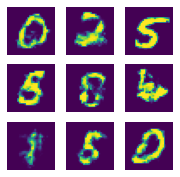

78000


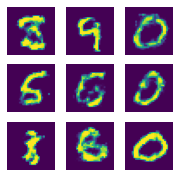

79000


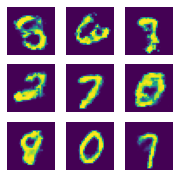

80000


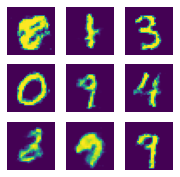

81000


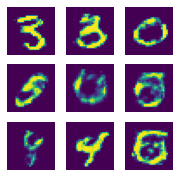

82000


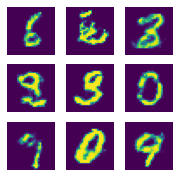

83000


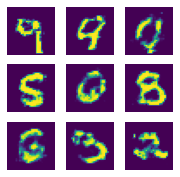

84000


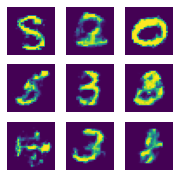

85000


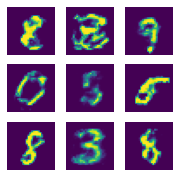

86000


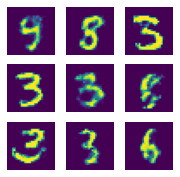

87000


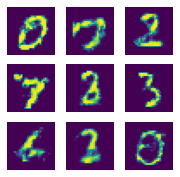

88000


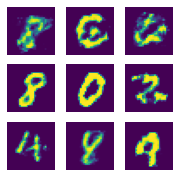

89000


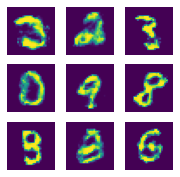

90000


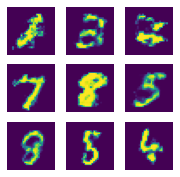

91000


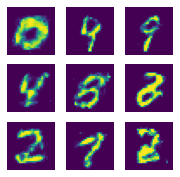

92000


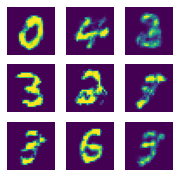

93000


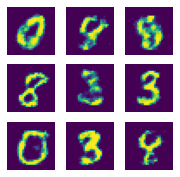

94000


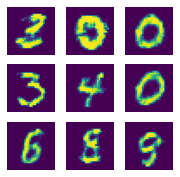

95000


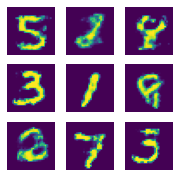

96000


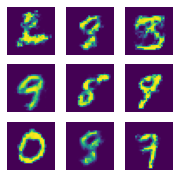

97000


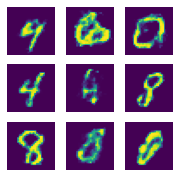

98000


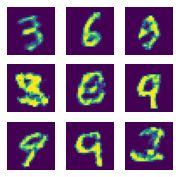

99000


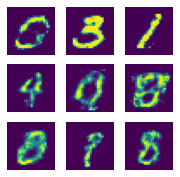

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

epochs = 100
batch_size = 128
batch_cnt = 100000

for batch in range(batch_cnt):

  # Real 이미지 from MNIST (랜덤하게)
  R_images = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]   #진짜 이미지 128개

  # 랜덤 노이즈 생성
  noise = np.random.normal(0, 1, size=[batch_size, z_dim])
  # Fake 이미지 생성
  G_images = generator.predict(noise)    #가짜 이미지 128개

  # Discriminator 학습 데이터 (input)
  D_X = np.concatenate([R_images, G_images])   #진짜 이미지와 가짜 이미지를 합쳐줌
  # Discriminator 학습 데이터 (output)
  # Real 이미지의 Label = 0.9, Fake는 = 0   진짜 이미지를 0.9로 리턴 하도록 함 
  D_Y = np.zeros(2*batch_size)
  D_Y[0:batch_size-1] = 0.9

  # Discriminator 학습
  discriminator.trainable = True
  D_loss = discriminator.train_on_batch(D_X, D_Y)
  discriminator.trainable = False

  # GAN 학습 데이터 (input, 랜덤 노이즈)
  GAN_X = np.random.normal(0, 1, size=[batch_size, z_dim])
  # GAN 학습 데이터 (output), Real 이미지와 같게 나오길 원하므로 목표 Y는 1
  GAN_Y = np.ones(batch_size)

  # GAN 학습
  GAN_loss = GAN.train_on_batch(GAN_X, GAN_Y)


  # 1000번째 배치마다 랜덤 이미지 9개 생성 확인
  if batch % 1000 == 0:
    
    print(batch)
    noise = np.random.normal(0, 1, size=(9, z_dim))
    G_images = generator.predict(noise)

    plt.figure(figsize = (3,3))
    for i in range(G_images.shape[0]):
      plt.subplot(3, 3, i+1)
      plt.imshow(G_images[i])
      plt.axis('off')
    plt.show()

